In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
data_mb = []

for year in range(2012,2022):
    # Construct the file path using pathlib
    file_path = Path('data/data_mb_all_years') / f'{year}.csv'
    csv = pd.read_csv(file_path)
    csv.columns = csv.columns.str.lower()
    
    df = pd.DataFrame()
    
    cols = ['weight', 'nefashot', 'nefashot18up', 'decile','madadpereferia', 'total_net', 'c31']
    
        
    df['mispar_mb'] = csv['misparmb'].astype(str) + '_' + str(year) # מספר משק בית כולל שנת דוח
    df['year'] = year # 
    df[cols] = csv[cols]
    
    rename_cols = {
        'madadpereferia': 'periferia_index',
        'c31': 'fruits_vegtables'
    }
    df.rename(columns=rename_cols, inplace=True)
    
    data_mb.append(df)

In [3]:
mb_df = pd.concat(data_mb)
mb_df

,mispar_mb,year,weight,nefashot,nefashot18up,decile,periferia_index,total_net,fruits_vegtables
0,240_2012,2012,294.590424,3,2.0,3,1.0,8873,533.0
1,257_2012,2012,205.387970,1,1.0,4,1.0,5111,714.0
2,265_2012,2012,162.562012,2,2.0,7,1.0,14144,797.0
3,273_2012,2012,163.866348,2,2.0,1,1.0,2198,240.0
4,281_2012,2012,289.078003,3,2.0,1,1.0,5873,243.0
...,...,...,...,...,...,...,...,...,...
6052,53760_2021,2021,182.102000,6,2.0,10,3.0,60662,272.0
6053,53762_2021,2021,278.277000,7,2.0,1,5.0,10443,34.0
6054,58002_2021,2021,604.582000,3,3.0,1,4.0,6226,388.0
6055,58031_2021,2021,429.712000,3,3.0,3,4.0,12082,316.0


In [4]:
data_food = []

for year in range(2012,2022):
    # Construct the file path using pathlib
    file_path = Path('data/data_food_all_years') / f'{year}.csv'
    csv = pd.read_csv(file_path)
    csv.columns = csv.columns.str.lower()
    
    df = pd.DataFrame()
    
    df['mispar_mb'] = csv['misparmb'].astype(str) + '_' + str(year) # מספר משק בית כולל שנת דוח
    
    cols_dict = {
        'food_no_fv':'c30', # הוצאה על אוכל ללא פירות וירקות
        'bread':'c300', # הוצאה על לחמים,דגנים ובצקים
        'oils':'c301', # הוצאה על שמנים צמחיים
        'meat_chicken':'c302', # הוצאה על בשר ועופות
        'fish':'c303', # הוצאה על דגים
        'milk_eggs':'c304', # הוצאה על חלב,מוצריו,ביצים
        'sugar':'c305', # הוצאה על סוכרים
        'soda':'c306', # הוצאה על משקאות קלים
        'alcohol':'c307', # הוצאה על אלכוהול
        'out':'c308', # הוצאה על אוכל בחוץ
        'others':'c309' # אחר
    }
    
    drinks = {
        'wine':'c307017',
        'beer':'c307025',
        'liqour':'c307033',
        'vodka':'c307058',
        'other_drinks':'c307041'
    }
    
    # Check if columns exist in csv DataFrame
    missing_columns = [drink for drink, code in drinks.items() if code not in csv.columns]

    # Fill missing columns with zeros in df DataFrame
    for col in missing_columns:
        df[col] = 0
        drinks.pop(col)
        
    df[list(drinks.keys())] = csv[drinks.values()]

    # Display the updated DataFrame
    df[list(cols_dict.keys())] = csv[cols_dict.values()]

    data_food.append(df)

In [5]:
food_df = pd.concat(data_food)
food_df

,mispar_mb,wine,beer,liqour,vodka,other_drinks,food_no_fv,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others
0,42_2012,0,0,0,0,0,2267,361,0,425,26,395,57,75,0,477,451
1,59_2012,0,0,0,0,0,1688,304,15,394,89,199,320,132,0,0,235
2,67_2012,37,0,0,0,0,4512,721,79,933,240,1061,209,0,37,988,246
3,75_2012,0,0,0,0,0,1495,244,211,374,136,218,123,57,0,0,132
4,83_2012,0,0,0,0,0,5645,490,155,765,0,845,35,0,0,2957,397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,53760_2021,0,0,0,0,0,12599,0,0,0,0,0,0,0,0,0,12599
6053,53762_2021,0,0,0,0,0,2163,387,93,705,86,189,27,357,0,0,316
6054,58002_2021,0,0,0,0,0,2191,306,0,582,0,565,0,629,0,0,107
6055,58031_2021,0,0,0,0,0,966,505,0,0,256,0,84,0,0,0,119


In [6]:
big_df = pd.concat([mb_df.set_index('mispar_mb'), food_df.set_index('mispar_mb')], axis=1, join="inner")
big_df['total_food'] = big_df['fruits_vegtables'] + big_df['food_no_fv']
big_df

,year,weight,nefashot,nefashot18up,decile,periferia_index,total_net,fruits_vegtables,wine,beer,...,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,total_food
mispar_mb,,,,,,,,,,,,,,,,,,,,,
240_2012,2012,294.590424,3,2.0,3,1.0,8873,533.0,0,0,...,80,178,209,425,87,67,0,0,723,2768.0
257_2012,2012,205.387970,1,1.0,4,1.0,5111,714.0,0,0,...,0,0,0,0,0,0,0,44,44,802.0
265_2012,2012,162.562012,2,2.0,7,1.0,14144,797.0,0,0,...,0,400,24,134,15,0,0,0,216,1821.0
273_2012,2012,163.866348,2,2.0,1,1.0,2198,240.0,0,0,...,0,378,70,127,223,0,0,0,7,1116.0
281_2012,2012,289.078003,3,2.0,1,1.0,5873,243.0,0,0,...,20,0,33,204,22,35,0,44,135,1149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53760_2021,2021,182.102000,6,2.0,10,3.0,60662,272.0,0,0,...,0,0,0,0,0,0,0,0,12599,12871.0
53762_2021,2021,278.277000,7,2.0,1,5.0,10443,34.0,0,0,...,93,705,86,189,27,357,0,0,316,2197.0
58002_2021,2021,604.582000,3,3.0,1,4.0,6226,388.0,0,0,...,0,582,0,565,0,629,0,0,107,2579.0


In [7]:
from funcs import weighted_average

def w_avg(col):
    return weighted_average(big_df, col, 'weight')

by_periferia = big_df.groupby(['periferia_index']).agg(w_avg)

index_to_strs = ['Very Periferia','Periferia','Medium','Central','Very Central']

by_periferia.index = index_to_strs

by_periferia

,year,weight,nefashot,nefashot18up,decile,total_net,fruits_vegtables,wine,beer,liqour,...,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,total_food
Very Periferia,2015.794046,419.318576,3.044841,2.100698,4.827940,15373.634372,486.735904,22.772558,17.008872,1.935693,...,61.336481,363.013819,91.910041,289.887998,77.339311,76.799466,60.005718,346.316561,210.804216,2387.730215
Periferia,2017.369472,481.883111,3.768602,2.406011,4.394480,16563.835668,605.231169,14.480877,10.313374,0.727115,...,65.064683,657.337082,100.650972,334.054200,95.548319,98.874208,37.529882,341.640666,260.011434,2965.044031
Medium,2016.263557,411.822164,3.393246,2.255372,4.901641,17082.533759,515.525379,19.631321,12.876193,1.413441,...,54.575173,467.683984,103.717112,330.660506,82.797972,89.244104,49.467617,353.382109,222.123149,2624.901741
Central,2017.271739,449.995760,3.356938,2.237931,5.794479,20873.101188,527.928257,24.345053,12.705666,1.325969,...,47.849747,426.564421,111.000556,352.312218,80.427373,76.428659,56.311368,399.542698,245.848410,2676.641464
Very Central,2016.611759,480.220553,3.033951,2.110551,6.071067,20099.872118,499.642694,25.981164,11.928185,1.048675,...,42.055895,343.660403,95.918143,312.634307,73.344504,68.572211,51.856288,474.800333,247.425853,2523.489536


In [8]:
periferia_ready = by_periferia.apply(lambda x: (x / by_periferia['total_food']) * 100)
periferia_ready.drop(columns=['year','decile','nefashot','total_net','food_no_fv','total_food','weight'],inplace=True)
periferia_ready['sum'] = periferia_ready.iloc[:,:].sum(axis=1)

# הבדלי צריכת מזון בין פריפריה למרכז
# ניתן לראות את הפערים בצריכת מזון מחוץ לבית (משמעותית יותר בקרב ערים מרכזיות יותר)
# ניתן לראות את הפערים בצריכת עוף ובשר
periferia_ready

,nefashot18up,fruits_vegtables,wine,beer,liqour,vodka,other_drinks,bread,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,sum
Very Periferia,0.087979,20.384879,0.953732,0.712345,0.081068,0.229012,0.496009,13.351057,2.568820,15.203301,3.849264,12.140735,3.239031,3.216421,2.513086,14.504007,8.828645,102.359392
Periferia,0.081146,20.412215,0.488387,0.347832,0.024523,0.081158,0.295372,12.360426,2.194392,22.169556,3.394586,11.266416,3.222492,3.334662,1.265745,11.522280,8.769227,101.230414
Medium,0.085922,19.639797,0.747888,0.490540,0.053847,0.174146,0.390404,13.322014,2.079132,17.817200,3.951276,12.597062,3.154327,3.399903,1.884551,13.462680,8.462151,101.712839
Central,0.083610,19.723533,0.909537,0.474687,0.049539,0.114225,0.506303,12.933525,1.787679,15.936554,4.147009,13.162473,3.004787,2.855394,2.103807,14.927016,9.184959,101.904636
Very Central,0.083636,19.799674,1.029573,0.472686,0.041557,0.118569,0.382652,12.236343,1.666577,13.618460,3.801012,12.388968,2.906471,2.717357,2.054944,18.815229,9.804909,101.938616


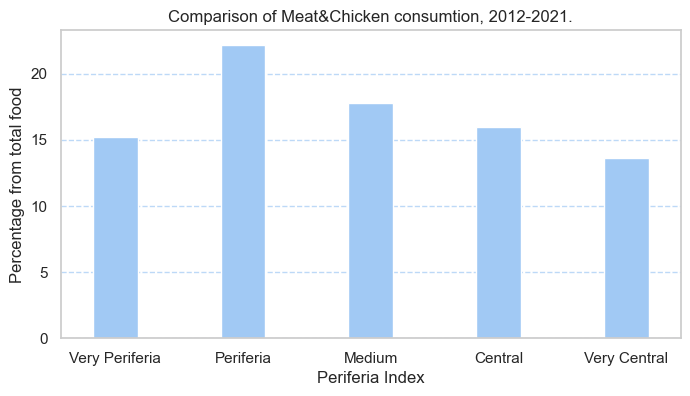

In [34]:
sns.set(style="whitegrid", palette="pastel")

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

width = 0.35  # Width of the bars
periferia_ready['meat_chicken'].plot(kind='bar', width=width, label='Meat&Chicken', ax=ax, rot=0)
ax.set_title('Comparison of Meat&Chicken consumtion, 2012-2021.')
ax.set_xlabel('Periferia Index')
ax.set_ylabel('Percentage from total food')

# Styles
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])  # Use the color from the palette
ax.xaxis.grid(False)

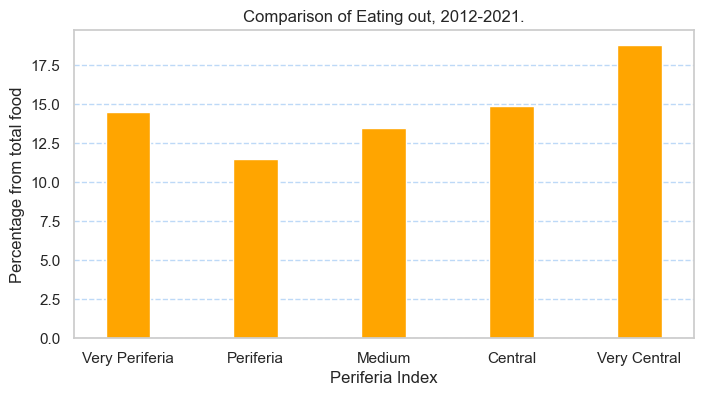

In [33]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

periferia_ready['out'].plot(kind='bar', width=width, label='Out', ax=ax, color='orange', rot=0)
ax.set_title('Comparison of Eating out, 2012-2021.')
ax.set_xlabel('Periferia Index')
ax.set_ylabel('Percentage from total food')

# Styles
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])  # Use the color from the palette
ax.xaxis.grid(False)

In [10]:
alcohols_by_periferia = by_periferia[['wine','liqour','beer','vodka','other_drinks']]
alcohols_by_periferia = alcohols_by_periferia.assign(sum=alcohols_by_periferia.sum(axis=1))

as_pct = alcohols_by_periferia.apply(lambda x: (x/alcohols_by_periferia['sum'])*100)
as_pct.drop(columns='sum', inplace=True)
as_pct

,wine,liqour,beer,vodka,other_drinks
Very Periferia,38.578802,3.279241,28.814589,9.263623,20.063745
Periferia,39.472871,1.982014,28.112834,6.559412,23.872869
Medium,40.277788,2.899971,26.418221,9.378682,21.025337
Central,44.274993,2.411466,23.107088,5.560318,24.646134
Very Central,50.344959,2.032068,23.113821,5.797885,18.711266


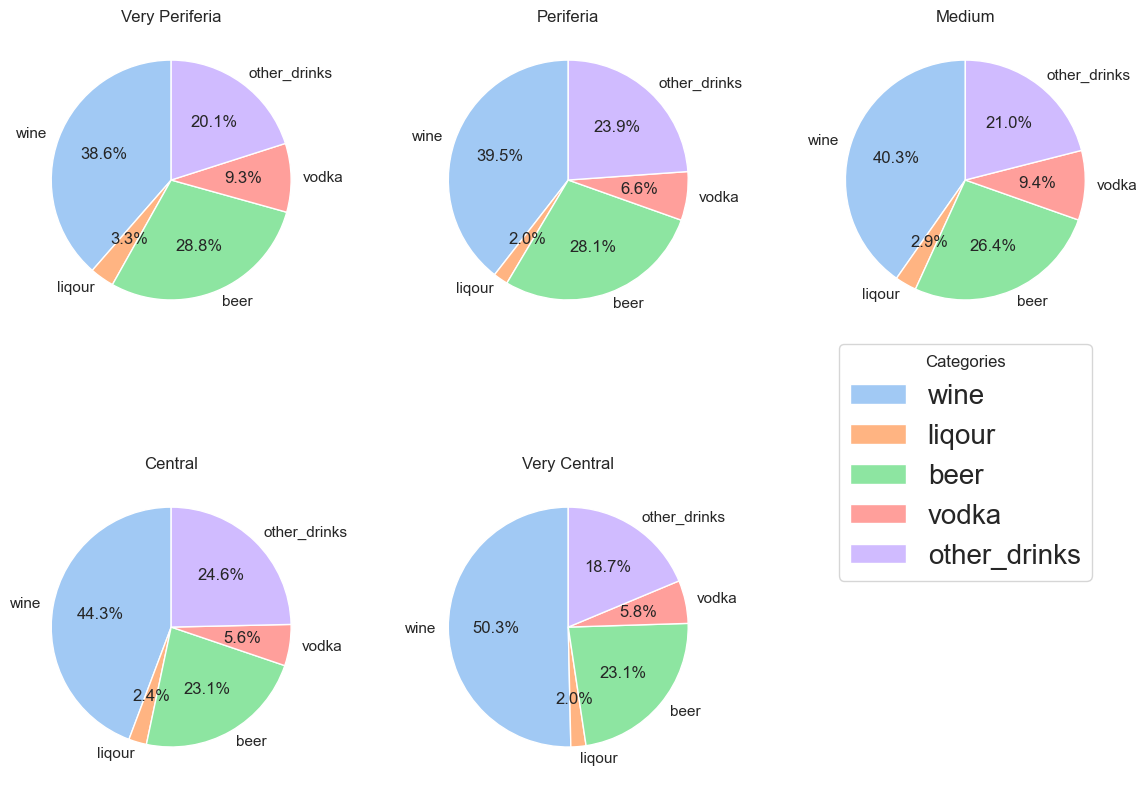

In [22]:
# Plotting five pie charts
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Create an empty list to store legend handles and labels
legend_handles = []

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        # Create a bigger legend with the same size as the 5th axes
        legend = ax.legend(legend_handles, sizes.index, title="Categories", loc="center", bbox_to_anchor=(0, 1, 1, 0.1), prop={'size':20})
        # Clear the empty graph behind
        ax.axis('off')
        break
    sizes = as_pct.iloc[i,:]
    wedges, texts, autotexts = ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90)
    
    # Add legend handles and labels
    legend_handles.extend(wedges)
    
    ax.set_title(sizes.name)

plt.tight_layout()
plt.show()


# * watch the wine over the sections
# * watch vodka over the sections

In [12]:
def w_avg(col):
    return weighted_average(big_df, col, 'weight')

# Create bins for 'decile' ranges
bins = np.arange(0.5,11,1)

# Create labels for the bins
labels = np.arange(1,11,1)

# Add a new column to the DataFrame with the 'decile' ranges
big_df.loc[:, 'decile_group'] = pd.cut(big_df['decile'], bins=bins, labels=labels)

by_decile = big_df.groupby(['decile_group']).agg(w_avg)

by_decile

,year,weight,nefashot,nefashot18up,decile,periferia_index,total_net,fruits_vegtables,wine,beer,...,oils,meat_chicken,fish,milk_eggs,sugar,soda,alcohol,out,others,total_food
decile_group,,,,,,,,,,,,,,,,,,,,,
1,2016.705682,544.347602,4.273613,2.152052,1.0,3.509434,5891.748992,443.859289,8.949057,5.081880,...,55.274230,477.103224,73.874795,279.039107,69.983860,84.560997,19.051532,177.858990,192.724349,2190.401086
2,2016.706122,493.069809,3.768640,2.176581,2.0,3.533978,9125.182467,472.755884,9.975589,6.746935,...,54.438147,464.108328,86.500715,290.789162,76.271057,85.190463,25.159636,194.128428,208.182085,2280.629598
3,2016.705722,468.400127,3.465214,2.202501,3.0,3.624435,11345.955940,461.703101,11.947025,9.705595,...,47.442728,458.492602,89.826324,292.914500,74.502501,83.107011,32.226590,223.622403,221.231985,2311.908940
4,2016.708021,466.762534,3.346594,2.207722,4.0,3.751560,13643.375838,483.621866,16.042164,10.874257,...,52.955822,431.886842,96.203505,303.310950,75.602593,80.851952,39.649814,267.374230,237.866365,2400.331194
5,2016.705922,457.028592,3.258727,2.261095,5.0,3.806887,16040.631497,496.383194,18.178053,13.292027,...,53.318086,435.043538,102.407463,316.842954,82.352761,84.714909,47.440058,323.723134,225.443816,2507.767152
6,2016.707648,451.535270,3.157904,2.259782,6.0,3.910791,18390.940130,507.520520,20.581600,15.137528,...,45.687718,400.140952,98.969156,325.431499,81.084361,81.625750,54.990027,386.018336,231.591462,2557.931005
7,2016.705232,438.214165,3.119498,2.261410,7.0,4.006298,21225.559599,532.279856,25.380727,14.589001,...,47.284032,400.034659,114.282496,341.920091,81.277809,76.709368,60.125520,465.127143,250.981252,2711.967246
8,2016.707490,414.953259,2.994484,2.242199,8.0,4.073281,24278.171364,560.631502,32.962828,16.463208,...,46.493631,395.883649,106.166600,357.833868,83.871260,74.151452,68.130304,529.981992,254.198937,2827.649453
9,2016.707476,416.584140,2.842969,2.205945,9.0,4.143295,28751.476069,599.225742,32.073141,14.862069,...,45.271424,410.384298,112.472400,372.083528,87.037240,70.900590,66.989899,652.448747,286.054917,3058.050268


In [13]:
alc_by_decile = by_decile[['wine','liqour','beer','vodka','other_drinks']]

alc_by_decile

,wine,liqour,beer,vodka,other_drinks
decile_group,,,,,
1,8.949057,0.288660,5.081880,1.210323,3.349063
2,9.975589,0.373336,6.746935,1.985097,5.749640
3,11.947025,0.593132,9.705595,2.848057,6.828289
4,16.042164,1.075154,10.874257,3.313654,7.961612
5,18.178053,1.273750,13.292027,3.866549,10.092723
6,20.581600,1.190526,15.137528,4.870973,12.921443
7,25.380727,1.715109,14.589001,5.129342,12.462821
8,32.962828,1.118859,16.463208,4.086506,12.920081
9,32.073141,2.100192,14.862069,2.619248,13.168234


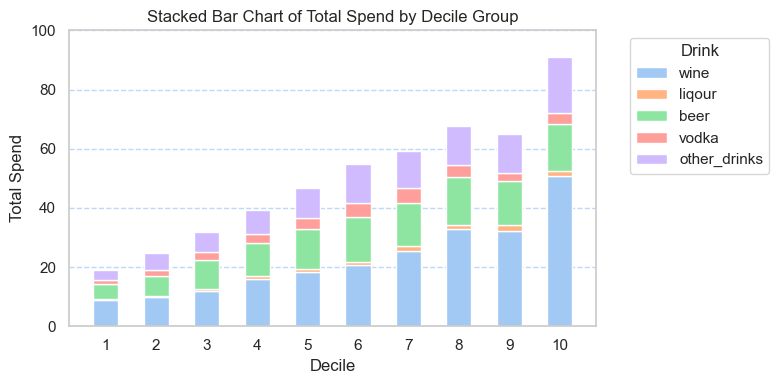

In [14]:
df = alc_by_decile

# Plotting a stacked bar chart treating each stack as one entity
fig, ax = plt.subplots(figsize=(8, 4))

# Width of each bar
bar_width = 0.5

# X-axis positions for each group
x_positions = range(len(df))

# Plot each category separately
for idx, col in enumerate(df.columns):
    bottom_values = df.iloc[:, :idx].sum(axis=1)
    ax.bar(x_positions, df[col], bottom=bottom_values, width=bar_width, label=col)


ax.set_ylabel('Total Spend')
ax.set_xlabel('Decile')
ax.set_title('Stacked Bar Chart of Total Spend by Decile Group')

# Rotate x-axis labels to 0 degrees
ax.set_xticks(x_positions)
ax.set_xticklabels(df.index, rotation=0)

# Set y-axis limit to 100
ax.set_ylim(top=100)

# annotate
# for i, (idx, row) in enumerate(alc_by_decile.iterrows()):
#     height = row.sum()
#     ax.annotate(f'{height:.2f}', (x_positions[i], height),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')


# Add legend
ax.legend(title='Drink', bbox_to_anchor=(1.05, 1), loc='upper left')

# Styles
ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])  # Use the color from the palette
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()